# MA(q)

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

For $\text{MA}(q)$ it can be shown that,

$
\begin{align}
&\text{E}[X_t] = 0 \\
&\text{E}[X_t^2] = \nu^q_t = \sigma^2 \left( \sum_{i=1}^q \vartheta_i^2 + 1 \right) \\
&\text{E}[X_t X_{t+n}] = \sigma^2 \left( \sum_{i=i}^{q-n} \vartheta_i \vartheta_{i+n} + \vartheta_n \right)
\end{align}
$

The autocorrelation is defined by,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t+n}]}{\text{E}[X_t^2]}
\end{align}
$

Note that $\gamma_n$ is independent of $t$. This is in contrast to $\text{AR}(1)$ which depends on $t$. Also, for</br>
$n \geq q$ it is seen that $\gamma_n=0$.

### Example $\text{MA}(1)$

First consider $\text{MA}(1)$,

$
\begin{align}
X_t = \varepsilon_t + \vartheta_1 \varepsilon_{t-1}
\end{align}
$

The moments are given by,

$
\begin{align}
&\text{E}[X_t] = 0 \\
&\nu^1_t = \sigma^2 \left( \vartheta_1^2 + 1 \right) \\
\end{align}
$

For $n=1$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = \sigma^2 \theta_1 \\
&\rho_1 = \theta_1
\end{align}
$

and $n > 2$,

$
\begin{align}
&\text{E}[X_t X_{t+2}] = 0 \\
&\rho_n = 0
\end{align}
$

### Example $\text{MA}(2)$

Next consider $\text{MA}(2)$,

$
\begin{align}
X_t = \varepsilon_t + \vartheta_1 \varepsilon_{t-1} + \vartheta_2 \varepsilon_{t-2} 
\end{align}
$

The moments are given by,

$
\begin{align}
&\text{E}[X_t] = 0 \\
&\nu^2_t = \sigma^2 \left( \vartheta_1^2 + \vartheta_2^2 + 1 \right) \\
\end{align}
$

For $n=1$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = \sigma^2 \left( \vartheta_1 \vartheta_2 + \vartheta_1 \right) \\
&\rho_1 = \vartheta_1 \vartheta_2 + \vartheta_1 + \vartheta_2
\end{align}
$

For $n=2$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = \sigma^2 \vartheta_2 \\
&\rho_2 = \vartheta_2
\end{align}
$

and $n>2$,

$
\begin{align}
&\text{E}[X_t X_{t+1}] = 0 \\
&\rho_n = 0
\end{align}
$

### Relation to $\text{AR}(1)$
AR(1) is related to $\text{MA}(\infty)$. To see this consider $\text{AR}(1)$,

$
\begin{align}
X_t = \left( 1 - \varphi L \right)^{-1} \varepsilon_t
\end{align}
$

where $L$ is the lag operator,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

In the limit $t \to \infty$ it can be shown that for $\lvert \varphi \rvert < 1$,

$
\begin{align}
\left( 1 - \varphi L \right)^{-1} = \sum_{i = 0}^{\infty} \varphi^i L^i
\end{align}
$

It follows that,

$
\begin{align}
X_t = \sum_{i=0}^{\infty} \varphi^i L^i \varepsilon_t
\end{align}
$

which is $\text{MA}(\infty)$ with $\vartheta_i = \varphi^i$.


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, DataFunc, SourceType, DataSource, PlotType)
from lib import (stack, fpoints, fcurve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1
nsample = 1000

def ac_plot(θ, σ, nsample, nlags):
    df = DataSource.create_source_type(SourceType.MA, θ=θ, σ=σ, npts=nsample)
    acf = DataFunc.apply_func_type(df, DataType.ACF, nlags=nlags)
    maq_acf = DataFunc.apply_func_type(df, DataType.MAQ_ACF, θ=θ, σ=σ, nlags=nlags)
    fpoints(data=acf, func=maq_acf)
    
def comparison_plot(θ_vals, ylim, *params):
    title = "MA(q) Comparison Plot"
    labels = [f"θ={val}" for val in θ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.MA, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)

def cumu_mean_plot(θ, σ, nsample):
    df = DataSource.create_source_type(SourceType.MA, θ=θ, σ=σ, npts=nsample)
    cumu_mean = DataFunc.apply_func_type(df, DataType.CUMU_MEAN)
    ma_mean = DataFunc.apply_func_type(df, DataType.ARMA_MEAN)
    fcurve(data=cumu_mean, func=ma_mean, title_offset=1.025, plot_type=PlotType.XLOG)
    
def cumu_sd_plot(θ, σ, nsample):
    df = DataSource.create_source_type(SourceType.MA, θ=θ, σ=σ, npts=nsample)
    cumu_sd = DataFunc.apply_func_type(df, DataType.CUMU_SD)
    maq_sd = DataFunc.apply_func_type(df, DataType.MAQ_SD, θ=θ, σ=σ)
    fcurve(data=cumu_sd, func=maq_sd, title_offset=1.025, plot_type=PlotType.XLOG)

## Simulations

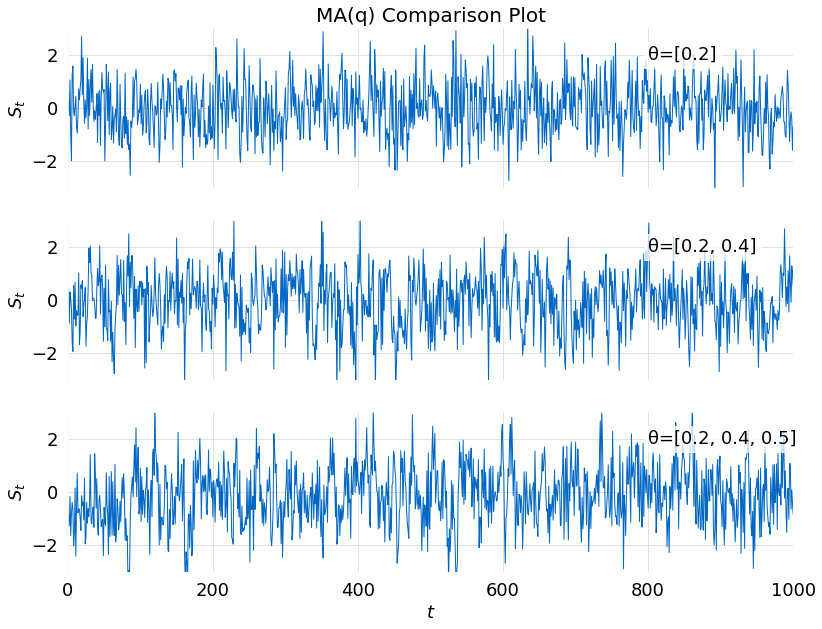

In [3]:
θ_vals = [[0.2], [0.2, 0.4], [0.2, 0.4, 0.5]]
params = [{"θ": θ, "σ": σ, "xmax": nsample} for θ in θ_vals]
comparison_plot(θ_vals, [-3.0, 3.0], *params)

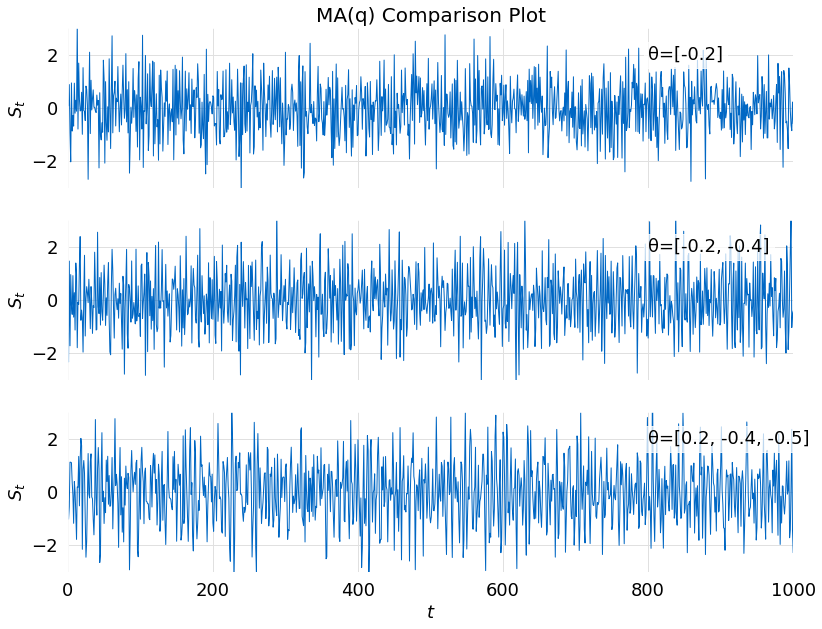

In [4]:
θ_vals = [[-0.2], [-0.2, -0.4], [0.2, -0.4, -0.5]]
params = [{"θ": θ, "σ": σ, "xmax": nsample} for θ in θ_vals]
comparison_plot(θ_vals, [-3.0, 3.0], *params)

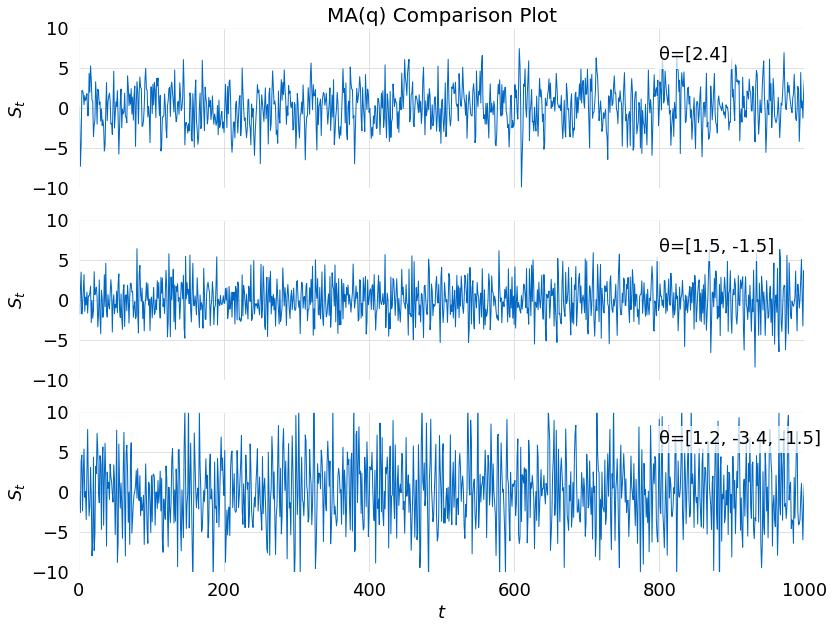

In [5]:
θ_vals = [[2.4], [1.5, -1.5], [1.2, -3.4, -1.5]]
params = [{"θ": θ, "σ": σ, "xmax": nsample} for θ in θ_vals]
comparison_plot(θ_vals, [-10.0, 10.0], *params)

## Mean

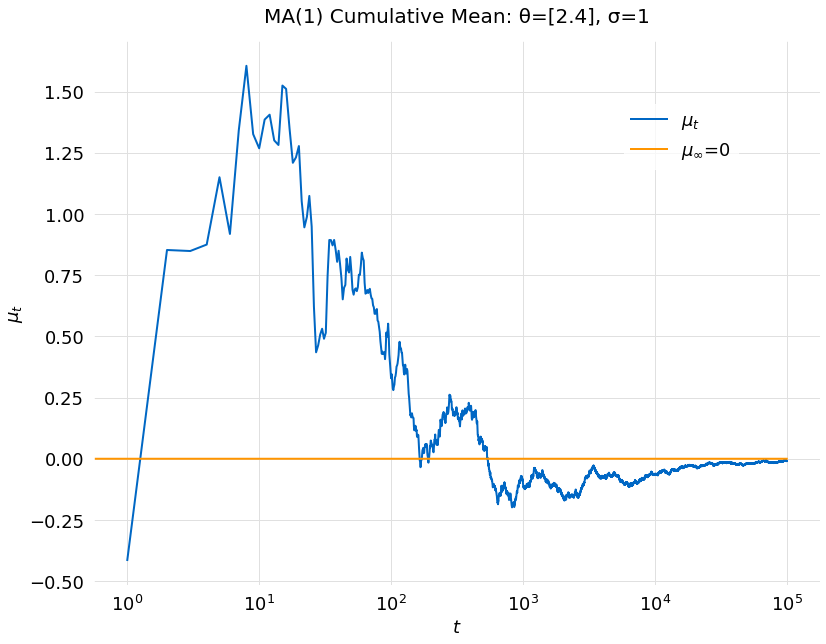

In [6]:
nsample = 100000
θ = [2.4]
cumu_mean_plot(θ, σ, nsample)

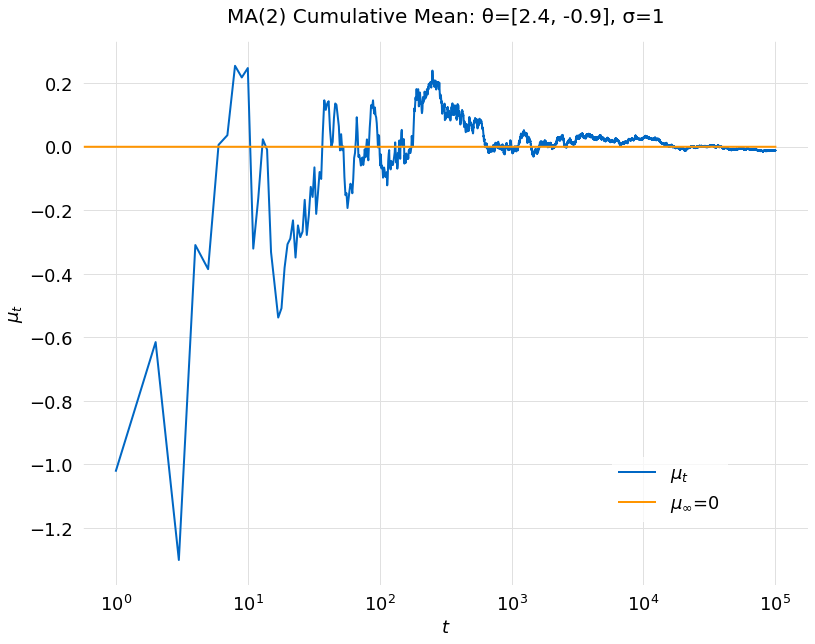

In [7]:
nsample = 100000
θ = [2.4, -0.9]
cumu_mean_plot(θ, σ, nsample)

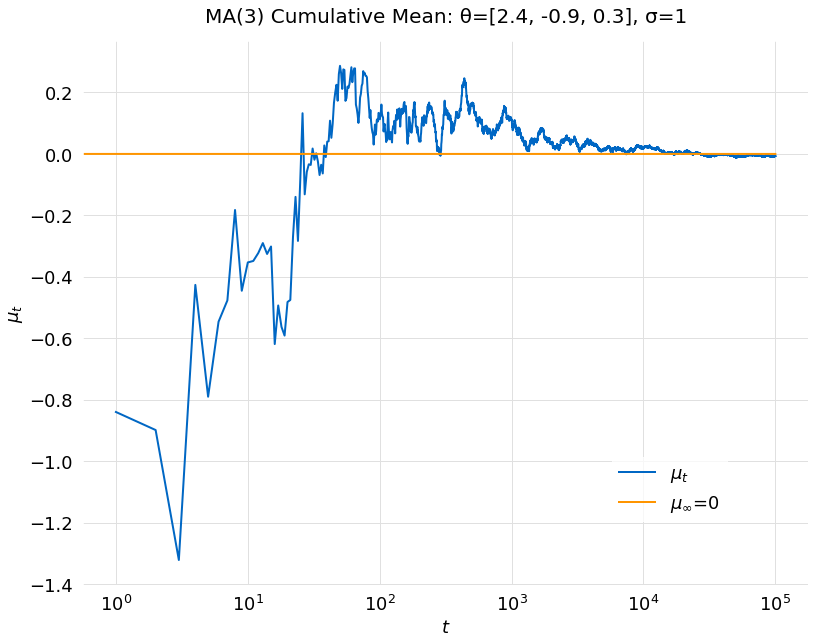

In [8]:
nsample = 100000
θ = [2.4, -0.9, 0.3]
cumu_mean_plot(θ, σ, nsample)

## Standard Deviation

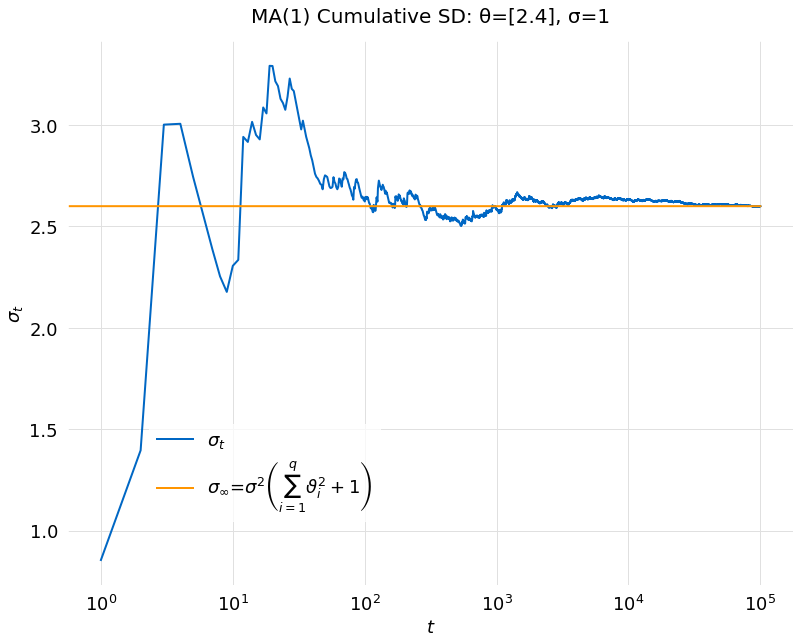

In [9]:
θ = [2.4]
nsample = 100000
cumu_sd_plot(θ, σ, nsample)

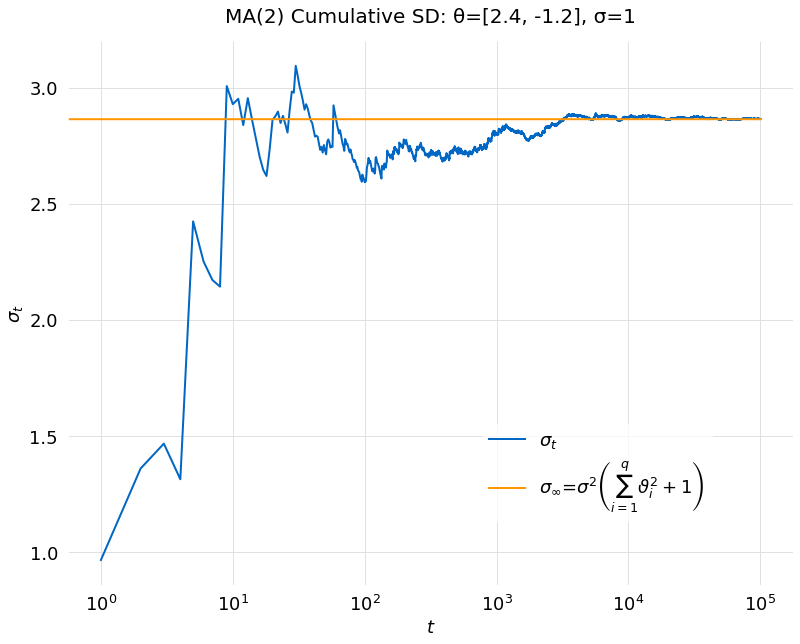

In [10]:
θ = [2.4, -1.2]
nsample = 100000
cumu_sd_plot(θ, σ, nsample)

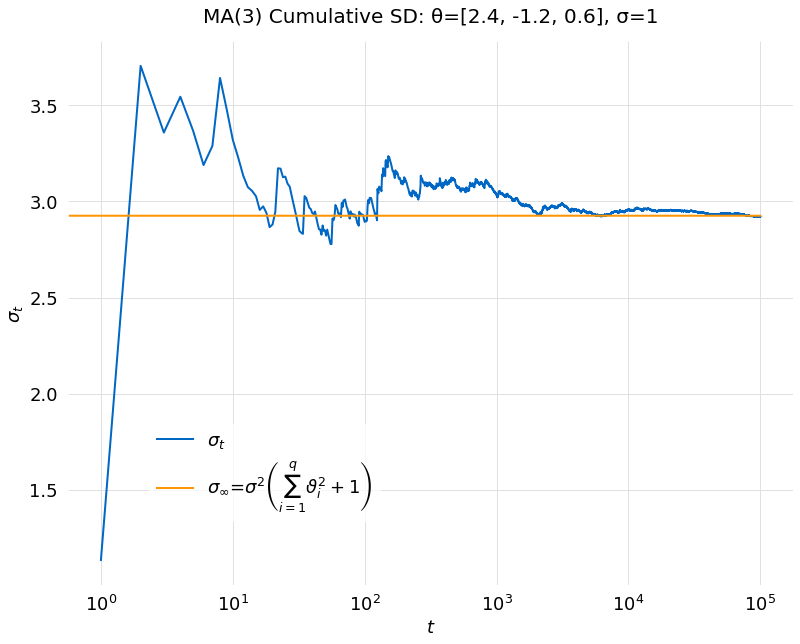

In [11]:
θ = [2.4, -1.2, 0.6]
nsample = 100000
cumu_sd_plot(θ, σ, nsample)

## Autocorrelation

In [12]:
θ = [0.2]
lag = 11
nsample = 50000
ac_plot(θ, σ, nsample, lag)

Exception: DataFrame does not contain schema=xcol=(ACF Lag), ycol=(ACF), data_type=(DataType.ACF)

In [ ]:
θ = [-0.2]
lag = 11
nsample = 50000
ac_plot(θ, σ, nsample, lag)

In [ ]:
θ = [0.4, 0.2]
lag = 11
nsample = 100000
ac_plot(θ, σ, nsample, lag)

In [ ]:
θ = [0.2, -0.2]
lag = 10
nsample = 50000
ac_plot(θ, σ, nsample, lag)

In [ ]:
θ = [0.2, 0.3, 0.1]
lag = 10
nsample = 500000
ac_plot(θ, σ, nsample, lag)

In [ ]:
θ = [0.4, -0.2, -0.1]
lag = 10
nsample = 50000
ac_plot(θ, σ, nsample, lag)